In [1]:
import numpy as np 
import pandas as pd
import matplotlib

In [2]:
# load data from csv

data_directory = 'data/'

q1_township_csv = data_directory + 'q1_townships.csv'
q1_transaction_csv = data_directory + 'q1_transactions.csv'
q1_poi_csv = data_directory + 'q1_pois.csv'

township_csv = data_directory + 'q2_townships.csv'
transaction_csv = data_directory + 'q2_transactions.csv'
poi_csv = data_directory + 'q2_pois.csv'

townships = pd.read_csv(q1_township_csv, na_values=['None'])
transactions = pd.read_csv(q1_transaction_csv, na_values=['None'])
pois = pd.read_csv(q1_poi_csv, na_values=['None'])

## Exploration on Twonship data

In [3]:
townships.head()

,project_id,asset_id,latitude,longitude,project_name,state,area,street_name,transaction_count,median_psf,median_price
0,10113,197831.0,3.200030,101.642998,Kepong Baru,Kuala Lumpur,Kepong,JALAN HELANG,4,388,775000
1,16814,198072.0,3.087248,101.721283,Bandar Tun Razak (Kampung Konggo),Kuala Lumpur,Bandar Tun Razak,JALAN JUJUR 3,3,294,396667
2,16319,10652.0,3.181050,101.672996,Sri Putramas I,Kuala Lumpur,Dutamas,JALAN PUTRAMAS 1,3,394,432667
3,17003,198261.0,3.149142,101.624763,Taman Tun Dr Ismail (TTDI),Kuala Lumpur,Taman Tun Dr Ismail,LENGKOK AMINUDDIN BAKI,3,814,1541667
4,25133,414613.0,3.192106,101.639056,Bandar Menjalara (Desa Seri Mahkota),Kuala Lumpur,Bandar Menjalara,JALAN 6/62,2,512,635000


In [4]:
townships.shape

(132, 11)

In [5]:
townships.describe()

,project_id,asset_id,latitude,longitude,transaction_count,median_psf,median_price
count,132.000000,126.000000,129.000000,129.000000,132.000000,132.000000,1.320000e+02
mean,14780.000000,161102.460317,3.018852,99.294902,1.272727,459.893939,8.175854e+05
std,5322.187322,139161.007630,0.479010,15.381447,0.933604,232.859039,8.960429e+05
min,8643.000000,3042.000000,0.000000,0.000000,1.000000,36.000000,5.000000e+04
25%,10849.250000,7703.500000,3.056050,101.616348,1.000000,329.000000,3.837500e+05
50%,13487.000000,197998.000000,3.104379,101.663002,1.000000,424.500000,5.675000e+05
75%,16896.250000,265539.000000,3.165540,101.710673,1.000000,551.750000,8.535000e+05
max,29292.000000,415438.000000,3.223386,101.842003,10.000000,1682.000000,7.200000e+06


In [6]:
townships.isnull().sum().sort_values(ascending = False)

asset_id             6
area                 4
longitude            3
latitude             3
street_name          1
median_price         0
median_psf           0
transaction_count    0
state                0
project_name         0
project_id           0
dtype: int64

In [7]:
townships[townships['area'].isnull()]

,project_id,asset_id,latitude,longitude,project_name,state,area,street_name,transaction_count,median_psf,median_price
6,29292,NaN,NaN,NaN,DESA PARK CITY (SOUTH LAKE),Kuala Lumpur,NaN,JALAN DENAI SELATAN,2,1124,1850000
29,26244,415438.0,NaN,NaN,Jalan Sri Hartamas,Kuala Lumpur,NaN,JALAN SRI HARTAMAS,1,824,550000
30,26245,415437.0,NaN,NaN,Jalan Stonor,Kuala Lumpur,NaN,JALAN STONOR,1,789,2650000
86,28531,NaN,0.0,0.0,Taman Sri Pelangi,Selangor,NaN,JALAN SUNGAI RABA,2,285,438800


In [8]:
townships['latitude'].value_counts()

0.000000    3
3.131900    1
3.220616    1
3.187610    1
3.203160    1
           ..
3.181397    1
3.211430    1
3.154346    1
3.077770    1
3.086390    1
Name: latitude, Length: 127, dtype: int64

In [9]:
townships['longitude'].value_counts()

0.000000      3
101.728996    2
101.680000    2
101.748001    2
101.661003    1
             ..
101.606003    1
101.681999    1
101.722033    1
101.593521    1
101.551003    1
Name: longitude, Length: 124, dtype: int64

In [10]:
# There're a few rows without valid latitude and longitude

townships[
    (townships['latitude'].isnull()) |
    (townships['latitude'] == 0) |
    (townships['longitude'].isnull()) |
    (townships['longitude'] == 0)
]

,project_id,asset_id,latitude,longitude,project_name,state,area,street_name,transaction_count,median_psf,median_price
6,29292,NaN,NaN,NaN,DESA PARK CITY (SOUTH LAKE),Kuala Lumpur,NaN,JALAN DENAI SELATAN,2,1124,1850000
29,26244,415438.0,NaN,NaN,Jalan Sri Hartamas,Kuala Lumpur,NaN,JALAN SRI HARTAMAS,1,824,550000
30,26245,415437.0,NaN,NaN,Jalan Stonor,Kuala Lumpur,NaN,JALAN STONOR,1,789,2650000
78,28340,NaN,0.0,0.0,Serenia City,Selangor,Dengkil,JALAN AMAN SERENIA 7/10 BANDAR SERENIA,10,388,624088
86,28531,NaN,0.0,0.0,Taman Sri Pelangi,Selangor,NaN,JALAN SUNGAI RABA,2,285,438800
104,8643,3042.0,0.0,0.0,Pangsapuri PKNS SS3,Selangor,Kelana Jaya,JALAN SS 3/39,1,216,130000


In [11]:
townships['median_psf'].value_counts()

352    4
306    2
285    2
432    2
307    2
      ..
424    1
425    1
683    1
429    1
512    1
Name: median_psf, Length: 111, dtype: int64

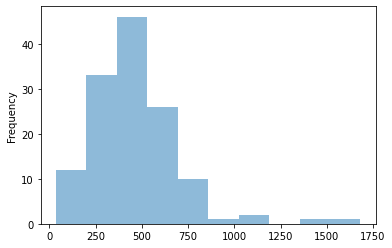

In [12]:
townships['median_psf'].plot.hist(bins = 10, alpha = 0.5)

In [13]:
townships['median_price'].value_counts()

450000    4
550000    3
700000    3
600000    3
635000    2
         ..
322896    1
475000    1
185000    1
565000    1
864000    1
Name: median_price, Length: 112, dtype: int64

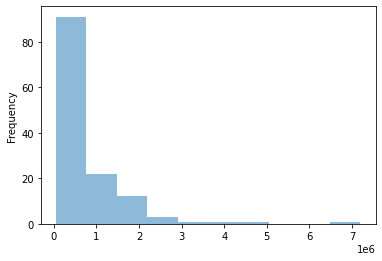

In [14]:
townships['median_price'].plot.hist(bins = 10, alpha = 0.5)

In [15]:
# Townships data are considered clean, only a few rows with None or 0 value for latitude and longitude
# There's row without gps coordination, keep street name to lookup geocode later
# The following columns will be retained for integration with the other two data sets. 
# project_id, latitude, longitude, project_name, state, area, street_name, median_psf, median_price

townships_q2 = townships[[
    'project_id', 'latitude', 'longitude', 'project_name', 'state', 'area', 'street_name', 
    'median_psf', 'median_price'
]]

townships_q2.sample(10)

,project_id,latitude,longitude,project_name,state,area,street_name,median_psf,median_price
34,16891,3.160685,101.643264,Kiara View Sungai Penchala,Kuala Lumpur,Kampung Sungai Penchala,JALAN PUNCAK KIARA INDAH,618,3700000
117,13999,3.049067,101.558453,Taman Pinggiran USJ,Selangor,USJ,JALAN PINGGIRAN USJ 3/3,189,265000
108,11355,3.106530,101.652000,Section 10 Petaling Jaya,Selangor,Petaling Jaya,JALAN 10/10A,341,550000
116,22811,2.908204,101.468182,Taman Panglima,Selangor,Telok Panglima Garang,JALAN TOMBAK,36,50000
13,16177,3.067360,101.699665,Bandar Baru Sri Petaling,Kuala Lumpur,Bandar Baru Sri Petaling,JALAN 8/149K,469,1100000
121,13218,3.008400,101.691002,Taman Universiti Indah,Selangor,Seri Kembangan,JALAN INDAH 1/28,303,600000
81,28428,2.880766,101.724023,Jenderam Impian,Selangor,Dengkil,JALAN KAJANG-DENGKIL,429,550000
94,23964,3.185111,101.505752,Elmina West @ Denai Alam,Selangor,Shah Alam,JALAN METAFASA U16/161,493,690000
19,17240,3.203637,101.717212,Danau Kota,Kuala Lumpur,Setapak,JALAN TAMAN IBU KOTA,284,199000
33,10125,3.168400,101.648003,Kiara Designer Suites,Kuala Lumpur,Mont Kiara,JALAN KIARA 3,573,820000


In [16]:
townships_q2.to_csv(township_csv)

## Exploration on POI data

In [17]:
pois.head()

,name,sub_type_label,sub_type_extra,sub_type,category,line_name,place_id,completion_year,type,city,district,public_type,curriculum_offered,latitude,longitude
0,Sekolah Menengah Kebangsaan Kepong Baru,Secondary,['SM Kebangsaan'],secondary,education,NaN,NaN,NaN,Public School,NaN,NaN,['SM Kebangsaan'],NaN,3.197770,101.647000
1,Sekolah Kebangsaan Taman Kepong,Primary,['Kebangsaan'],primary,education,NaN,NaN,NaN,Public School,NaN,NaN,['Kebangsaan'],NaN,3.198950,101.648000
2,Sekolah Kebangsaan Kepong Baru,Primary,['Kebangsaan'],primary,education,NaN,NaN,NaN,Public School,NaN,NaN,['Kebangsaan'],NaN,3.205899,101.645528
3,Sekolah Kebangsaan Menjalara,Primary,['Kebangsaan'],primary,education,NaN,NaN,NaN,Public School,NaN,NaN,['Kebangsaan'],NaN,3.193969,101.637578
4,Sekolah Menengah Kebangsaan Taman Bukit Maluri,Secondary,['SM Kebangsaan'],secondary,education,NaN,NaN,NaN,Public School,NaN,NaN,['SM Kebangsaan'],NaN,3.202450,101.634000


In [18]:
pois.shape

(5442, 15)

In [19]:
pois.describe()

,place_id,completion_year,latitude,longitude
count,0.0,945.000000,5442.000000,5442.000000
mean,NaN,2007.725926,3.127340,101.675702
std,NaN,10.905799,0.065307,0.054669
min,NaN,1995.000000,2.651790,101.421676
25%,NaN,1998.000000,3.089669,101.645000
50%,NaN,2003.000000,3.132765,101.681366
75%,NaN,2017.000000,3.178468,101.718000
max,NaN,2022.000000,3.246800,101.865288


In [20]:
pois.isnull().sum().sort_values(ascending = False)

place_id              5442
district              5325
city                  5325
curriculum_offered    4651
completion_year       4497
line_name             4497
public_type           2555
sub_type_extra        2555
type                   947
longitude                0
latitude                 0
category                 0
sub_type                 0
sub_type_label           0
name                     0
dtype: int64

In [21]:
pois['latitude'].value_counts()

3.076077    24
3.093210    17
3.185520    17
3.185218    17
3.123772    16
            ..
3.018483     1
2.993393     1
2.951248     1
2.921500     1
2.968750     1
Name: latitude, Length: 1233, dtype: int64

In [22]:
pois['longitude'].value_counts()

101.647000    41
101.720000    37
101.727000    34
101.728000    32
101.729000    30
              ..
101.515048     1
101.570449     1
101.505218     1
101.528177     1
101.795082     1
Name: longitude, Length: 1137, dtype: int64

In [23]:
# Completion year might be used if the main model is going to be time series
# By too many rows without completion year, this column will not be selected 

pois['completion_year'].value_counts()

1995.0    174
2022.0    161
1998.0    152
2017.0    128
1999.0     63
2015.0     57
2016.0     54
2003.0     45
1996.0     38
2020.0     30
2002.0     17
2019.0     16
2018.0     10
Name: completion_year, dtype: int64

In [24]:
# All POI data are clean, but duplicated POIs are likely exist
# We need the following columns to be retained for integration with the other two data sets
# name, category, latitude, longitude 

pois_q2 = pois[[
    'name', 'category', 'latitude', 'longitude'
]]

pois_q2.sample(10)

,name,category,latitude,longitude
401,Hi-5 House of Learning,education,3.150299,101.664755
3671,Sekolah Kebangsaan Gombak Setia,education,3.218685,101.715563
3601,Sekolah Kebangsaan Taman Dato Harun (2),education,3.077246,101.635939
2702,Sekolah Jenis Kebangsaan (Cina) Tai Thung,education,3.106086,101.705617
1046,Sekolah Kebangsaan Seri Setia,education,3.092883,101.683978
178,Segambut,transportation,3.186389,101.663889
3320,Sekolah Kebangsaan Sungai Pusu,education,3.236947,101.715548
2460,Tunku Azizah Women And Children'S Hospital,healthcare,3.196335,101.727782
12,Kolej Tingkatan Enam Desa Mahkota,education,3.188694,101.639831
2160,Taman Melati,transportation,3.219409,101.721727


In [25]:
pois_q2.to_csv(poi_csv)

## Exploration on Transaction data

In [26]:
transactions.head()

,project_id,project_name,transacted_price,unit_price_psf,date,property_type,tenure,floor,area_sqft,non_landed,bedrooms,street_name,psf,price,state,planning_region
0,10113,Kepong Baru,610000,310,1576454400,Terrace House,Leasehold,NaN,1970,0,3.0,JALAN HELANG,310,610000,Kuala Lumpur,Kepong
1,10113,Kepong Baru,720000,468,1576195200,Terrace House,Leasehold,NaN,1539,0,3.0,LORONG LANG HITAM 6,468,720000,Kuala Lumpur,Kepong
2,10113,Kepong Baru,670000,435,1576108800,Terrace House,Leasehold,NaN,1539,0,3.0,JALAN LANG KEPALA PUTIH,435,670000,Kuala Lumpur,Kepong
3,10113,Kepong Baru,1100000,336,1575936000,Terrace House,Leasehold,NaN,3272,0,3.0,JALAN CHIAK RAYA,336,1100000,Kuala Lumpur,Kepong
4,16814,Bandar Tun Razak (Kampung Konggo),280000,283,1575936000,Cluster House,Leasehold,NaN,990,0,2.0,JALAN JUJUR 3,283,280000,Kuala Lumpur,Bandar Tun Razak


In [27]:
transactions.shape

(166, 16)

In [28]:
transactions.describe()

,project_id,transacted_price,unit_price_psf,date,area_sqft,non_landed,bedrooms,psf,price
count,166.000000,1.660000e+02,166.000000,1.660000e+02,166.000000,166.000000,163.000000,166.000000,1.660000e+02
mean,15757.313253,8.231200e+05,460.259036,1.576077e+09,1708.692771,0.409639,3.343558,460.259036,8.231200e+05
std,6212.985326,8.382611e+05,227.408774,6.868198e+05,1123.250142,0.493255,0.958267,227.408774,8.382611e+05
min,8643.000000,5.000000e+04,36.000000,1.575158e+09,409.000000,0.000000,1.000000,36.000000,5.000000e+04
25%,11149.500000,4.137500e+05,337.000000,1.575418e+09,1055.000000,0.000000,3.000000,337.000000,4.137500e+05
50%,13586.000000,5.998880e+05,411.000000,1.575936e+09,1469.000000,0.000000,3.000000,411.000000,5.998880e+05
75%,17003.000000,8.875000e+05,543.500000,1.576541e+09,1854.000000,1.000000,4.000000,543.500000,8.875000e+05
max,29292.000000,7.200000e+06,1682.000000,1.577750e+09,8084.000000,1.000000,7.000000,1682.000000,7.200000e+06


In [29]:
transactions.isnull().sum().sort_values(ascending = False)

floor               100
planning_region       6
bedrooms              3
street_name           1
state                 0
price                 0
psf                   0
non_landed            0
area_sqft             0
tenure                0
property_type         0
date                  0
unit_price_psf        0
transacted_price      0
project_name          0
project_id            0
dtype: int64

In [30]:
transactions[transactions['planning_region'].isnull()]

,project_id,project_name,transacted_price,unit_price_psf,date,property_type,tenure,floor,area_sqft,non_landed,bedrooms,street_name,psf,price,state,planning_region
17,29292,DESA PARK CITY (SOUTH LAKE),1900000,1154,1577664000,Terrace House,Leasehold,NaN,1647,0,4.0,JALAN DENAI SELATAN,1154,1900000,Kuala Lumpur,NaN
18,29292,DESA PARK CITY (SOUTH LAKE),1800000,1093,1576022400,Terrace House,Leasehold,NaN,1647,0,4.0,JALAN DENAI SELATAN,1093,1800000,Kuala Lumpur,NaN
46,26244,Jalan Sri Hartamas,550000,824,1577318400,Hotel/Service Apartment,Leasehold,15,667,1,NaN,JALAN SRI HARTAMAS,824,550000,Kuala Lumpur,NaN
47,26245,Jalan Stonor,2650000,789,1575417600,Condominium/Apartment,Leasehold,17,3358,1,6.0,JALAN STONOR,789,2650000,Kuala Lumpur,NaN
121,28531,Taman Sri Pelangi,438800,285,1575417600,Terrace House,Leasehold,NaN,1539,0,4.0,JALAN SUNGAI RABA,285,438800,Selangor,NaN
122,28531,Taman Sri Pelangi,438800,285,1575417600,Terrace House,Leasehold,NaN,1539,0,4.0,JALAN SUNGAI RABA,285,438800,Selangor,NaN


In [31]:
transactions['unit_price_psf'].value_counts()

406    6
352    3
398    3
402    3
285    3
      ..
419    1
709    1
425    1
427    1
533    1
Name: unit_price_psf, Length: 135, dtype: int64

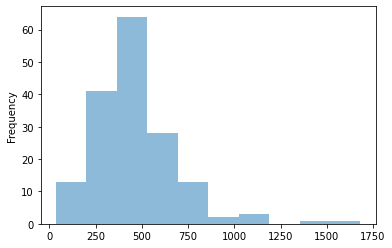

In [32]:
transactions['unit_price_psf'].plot.hist(bins = 10, alpha = 0.5)

In [33]:
transactions['transacted_price'].value_counts()

450000     6
611888     6
550000     5
600000     4
700000     3
          ..
80000      1
385000     1
985000     1
4500000    1
322896     1
Name: transacted_price, Length: 123, dtype: int64

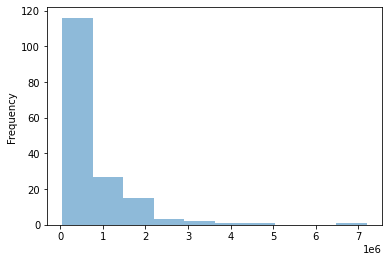

In [34]:
transactions['transacted_price'].plot.hist(bins = 10, alpha = 0.5)

In [35]:
transactions['psf'].value_counts()

406    6
352    3
398    3
402    3
285    3
      ..
419    1
709    1
425    1
427    1
533    1
Name: psf, Length: 135, dtype: int64

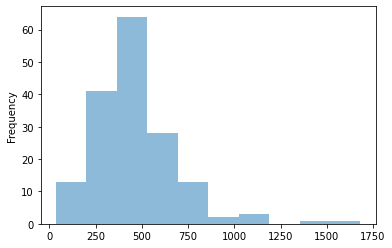

In [36]:
transactions['psf'].plot.hist(bins = 10, alpha = 0.5)

In [37]:
transactions['price'].value_counts()

450000     6
611888     6
550000     5
600000     4
700000     3
          ..
80000      1
385000     1
985000     1
4500000    1
322896     1
Name: price, Length: 123, dtype: int64

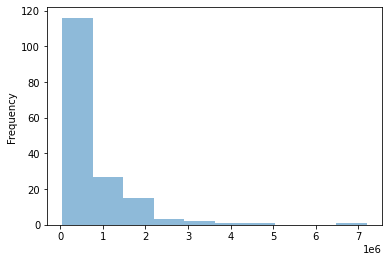

In [38]:
transactions['price'].plot.hist(bins = 10, alpha = 0.5)

In [39]:
# 'unit_price_psf' and 'psf' are identical
transactions['unit_price_psf_vs_psf'] = transactions['unit_price_psf'] - transactions['psf']
transactions['unit_price_psf_vs_psf'].value_counts()

0    166
Name: unit_price_psf_vs_psf, dtype: int64

In [40]:
# 'transacted_price' and 'price' are identical
transactions['transacted_price_vs_price'] = transactions['transacted_price'] - transactions['price']
transactions['transacted_price_vs_price'].value_counts()

0    166
Name: transacted_price_vs_price, dtype: int64

In [41]:
transactions['property_type'].value_counts()

Terrace House              78
Condominium/Apartment      46
Hotel/Service Apartment    17
Semi-Detached House        13
Flat                        5
Cluster House               3
Detached House              2
Town House                  2
Name: property_type, dtype: int64

In [42]:
transactions['non_landed'].value_counts()

0    98
1    68
Name: non_landed, dtype: int64

In [43]:
# Something might be wrong with the data crawled, all rows has value 'Leasehold' for tenure
transactions['tenure'].value_counts()

Leasehold    166
Name: tenure, dtype: int64

In [44]:
transactions['bedrooms'].value_counts()

3.0    93
4.0    39
2.0    17
5.0     6
6.0     4
7.0     3
1.0     1
Name: bedrooms, dtype: int64

In [45]:
# For service appartment or studio, it's reasonable to be without a room.
transactions[pd.isna(transactions['bedrooms'])]


,project_id,project_name,transacted_price,unit_price_psf,date,property_type,tenure,floor,area_sqft,non_landed,bedrooms,street_name,psf,price,state,planning_region,unit_price_psf_vs_psf,transacted_price_vs_price
45,25495,Jalan Cheras,560000,733,1576022400,Hotel/Service Apartment,Leasehold,12,764,1,NaN,JALAN CHERAS,733,560000,Kuala Lumpur,Cheras,0,0
46,26244,Jalan Sri Hartamas,550000,824,1577318400,Hotel/Service Apartment,Leasehold,15,667,1,NaN,JALAN SRI HARTAMAS,824,550000,Kuala Lumpur,NaN,0,0
158,21820,Trefoil,325000,671,1576195200,Hotel/Service Apartment,Leasehold,36,484,1,NaN,JALAN SETIA DAGANG AH U13/AH,671,325000,Selangor,Setia Alam/Alam Nusantara,0,0


In [46]:
# POI data are clean, there are likely duplicated records to be removed
# we need the following columns to be retained for integration with the other two data sets
# projectid, date, proptype, tenure, area_sqft, non_landed, bedrooms, street_name, psf, price, planning_region

transactions_q2 = transactions[[
    'project_id', 'date', 'property_type', 'tenure', 'area_sqft', 'non_landed', 'bedrooms', 
    'street_name', 'psf', 'price', 'planning_region'
]]

transactions_q2.sample(10)

,project_id,date,property_type,tenure,area_sqft,non_landed,bedrooms,street_name,psf,price,planning_region
115,11769,1575331200,Detached House,Leasehold,8084,0,5.0,JALAN SS 19/4E,371,3000000,Subang Jaya
21,11721,1575331200,Condominium/Apartment,Leasehold,1948,1,2.0,JALAN MEDANG SERAI,1006,1960000,Bangsar
156,13218,1575936000,Terrace House,Leasehold,1981,0,3.0,JALAN INDAH 1/28,303,600000,Seri Kembangan
105,11518,1576454400,Terrace House,Leasehold,1302,0,4.0,JALAN ECOHILL 1/3B,361,470000,Semenyih
150,12610,1575590400,Terrace House,Leasehold,1399,0,3.0,JALAN MERANTI JAYA 1/11,493,690000,Puchong
161,13592,1575936000,Terrace House,Leasehold,3337,0,3.0,JALAN USJ 11/7,330,1100000,USJ
126,9233,1576627200,Terrace House,Leasehold,1539,0,4.0,JALAN VISTA 3/1A,450,693000,Cheras South
57,24915,1577318400,Condominium/Apartment,Leasehold,1044,1,3.0,JALAN BESI KAWI,177,184803,Salak Selatan
84,25349,1575590400,Condominium/Apartment,Leasehold,657,1,2.0,OFF JALAN LANGKAWI,365,240000,Setapak
7,16319,1577145600,Condominium/Apartment,Leasehold,1098,1,3.0,JALAN PUTRAMAS 1,410,450000,Dutamas


In [47]:
transactions_q2.to_csv(transaction_csv)